## ジョブの実行

以下の`PROGRAM = `に実行したい.pyファイル名を記入する.  
実行がなかなか終わらない場合はカーネル再起動が必要かもしれない.  
`payloads`に測定結果が返ってくる.  

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from oqtopus_sse_pulse.adapter import QuriAdapter, collect_payloads_from_job, collect_session_from_job
from oqtopus_sse_pulse.plotters import plot_payload

In [2]:
from quri_parts_oqtopus.backend.config import OqtopusConfig
import os
url = os.getenv("OQTOPUS_URL")
token = os.getenv("OQTOPUS_API_TOKEN")
if url is None:
    url = ""
if token is None:
    token = ""
config = OqtopusConfig(url=url, api_token=token)

In [3]:
print(url)

https://api.qiqb-cloud.jp


In [4]:
# ジョブの実行

DEVICE = "anemone"
PROGRAM = "check_waveform" # 読み出しパルスの反射波形を確認するプログラム

backend = OqtopusSseBackend(config=config)

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068ef107-5e24-7b54-8000-ec9e4cbc320b
job_status = succeeded  elapsed=15.239
sample: [{'mode': 'avg', 'data': {'Q08': {'raw': {'I': [-0.0029451302252709866, 0.0057947998866438866, -0.0014231873210519552, -0.003108552424237132, -0.00553382420912385, -0.006707595661282539, -0.004053737036883831, -0.008293150924146175, 0.0008239709422923625, 0.010652265511453152, 0.005595284979790449, 0.0031734565272927284, 0.007863953709602356, -0.0002244588395114988, -0.004604130517691374, 0.0021721096709370613, -0.000432525877840817, -0.004047366324812174, -0.0005402227980084717, -0.003770375158637762, -0.009867158718407154, -0.013669791631400585, -0.009150913916528225, -0.003015568945556879, -0.0019761526491492987, -0.005030594766139984, -0.008641369640827179, -0.007549297995865345, -0.005541338585317135, -0.004456249997019768, -0.008474655449390411, -0.0027478993870317936, -0.0010417246958240867, 0.0016075167804956436, 7.504040695494041e-05, -0.006792952306568623, -0.008133284747600555, -0.00

In [5]:
# 測定結果
payloads

[{'mode': 'avg',
  'data': {'Q08': {'raw': {'I': [-0.0029451302252709866,
      0.0057947998866438866,
      -0.0014231873210519552,
      -0.003108552424237132,
      -0.00553382420912385,
      -0.006707595661282539,
      -0.004053737036883831,
      -0.008293150924146175,
      0.0008239709422923625,
      0.010652265511453152,
      0.005595284979790449,
      0.0031734565272927284,
      0.007863953709602356,
      -0.0002244588395114988,
      -0.004604130517691374,
      0.0021721096709370613,
      -0.000432525877840817,
      -0.004047366324812174,
      -0.0005402227980084717,
      -0.003770375158637762,
      -0.009867158718407154,
      -0.013669791631400585,
      -0.009150913916528225,
      -0.003015568945556879,
      -0.0019761526491492987,
      -0.005030594766139984,
      -0.008641369640827179,
      -0.007549297995865345,
      -0.005541338585317135,
      -0.004456249997019768,
      -0.008474655449390411,
      -0.0027478993870317936,
      -0.00104172469582408

測定結果のグラフ表示は, `plot_payload`関数を用いるか, `payloads`から値を直接取り出してプロットする.  

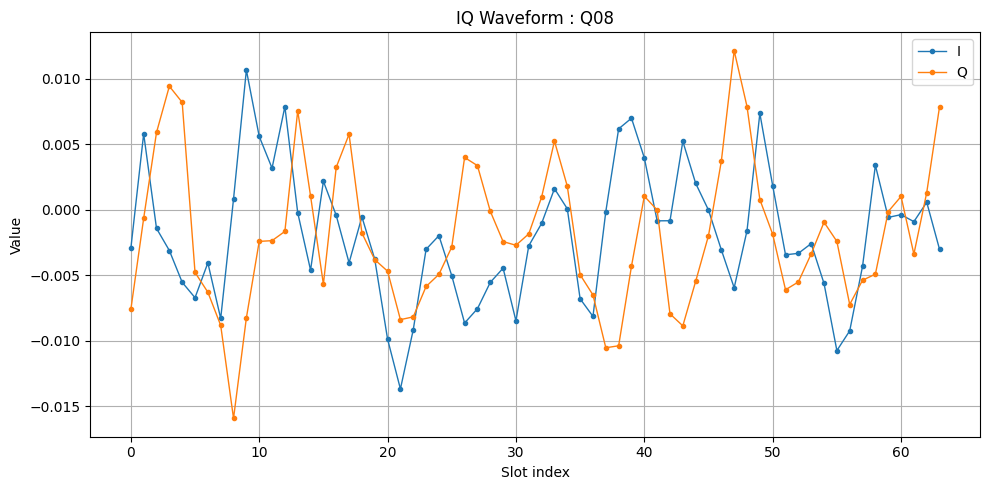

In [6]:
# グラフ描画

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)

In [7]:
# より詳細な情報を確認することもできます。
session = collect_session_from_job(
	backend=adapter,
	job_id=job.job_id,
)
session

{'log_file': PosixPath('extracted/ssecontainer.log'),
 'text': 'Python 3.11.9 (main, Sep  4 2024, 23:15:21) [GCC 12.2.0] on linux\nType "help", "copyright", "credits" or "license" for more information.\n>>> start program\n========================================\ndate: 2025-10-15 03:09:52\npython: 3.11.9\nqubex: 1.4.1b1+6937eef\nenv: /app/.venv\nconfig: /home/shared/qubex-config/64Qv2/config\nparams: /home/shared/qubex-config/64Qv2/params\nchip: 64Qv2 (AIST 8th #3 (1,1))\nqubits: [\'Q08\', \'Q09\', \'Q10\', \'Q11\']\nmuxes: [\'MUX02\']\nboxes: [\'S159A\']\n========================================\nSuccessfully connected.\npayload={\'mode\': \'avg\', \'data\': {\'Q08\': {\'raw\': {\'I\': [-0.0029451302252709866, 0.0057947998866438866, -0.0014231873210519552, -0.003108552424237132, -0.00553382420912385, -0.006707595661282539, -0.004053737036883831, -0.008293150924146175, 0.0008239709422923625, 0.010652265511453152, 0.005595284979790449, 0.0031734565272927284, 0.007863953709602356, -0.000

In [ ]:
# ラビ振動測定

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)


job_id = 068e84b8-bb28-773a-8000-812a42da2761
job_status = succeeded  elapsed=49.873


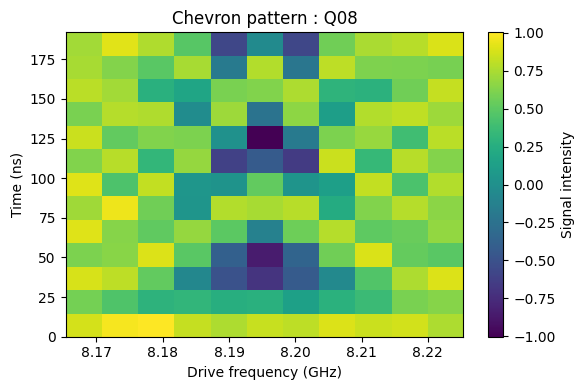

In [ ]:
# シェブロンパターン測定

DEVICE = "anemone"
PROGRAM = "chevron_pattern"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

# グラフ描画
p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)
